In [ ]:
# Import Liabraries
import numpy as np                      
import pandas as pd                
import matplotlib.pyplot as plt                      
import seaborn as sns                              


In [128]:
# Impoty data for analysis
df = pd.read_csv('temp_data.csv')

df.head()

,#,Date-Time (CST/CDT),Temperature (°F),RH (%),Dew Point (°F),Host Connected,End of File
0,1,11/10/2023 09:52:55,75.85,37.73,48.27,NaN,NaN
1,2,11/10/2023 10:02:55,71.31,33.61,41.23,NaN,NaN
2,3,11/10/2023 10:12:55,69.82,34.66,40.71,NaN,NaN
3,4,11/10/2023 10:22:55,69.35,36.37,41.55,NaN,NaN
4,5,11/10/2023 10:32:55,69.48,37.09,42.17,NaN,NaN


In [129]:
# identifynum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27649 entries, 0 to 27648
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    27649 non-null  int64  
 1   Date-Time (CST/CDT)  27649 non-null  object 
 2   Temperature   (°F)   27648 non-null  float64
 3   RH   (%)             27648 non-null  float64
 4   Dew Point   (°F)     27648 non-null  float64
 5   Host Connected       1 non-null      object 
 6   End of File          1 non-null      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


In [130]:
# drop columns
df_drop = df.iloc[:, 0:5]
df_drop.head()

,#,Date-Time (CST/CDT),Temperature (°F),RH (%),Dew Point (°F)
0,1,11/10/2023 09:52:55,75.85,37.73,48.27
1,2,11/10/2023 10:02:55,71.31,33.61,41.23
2,3,11/10/2023 10:12:55,69.82,34.66,40.71
3,4,11/10/2023 10:22:55,69.35,36.37,41.55
4,5,11/10/2023 10:32:55,69.48,37.09,42.17


In [131]:
print(df_drop.columns.tolist())

['#', 'Date-Time (CST/CDT)', 'Temperature   (°F)', 'RH   (%)', 'Dew Point   (°F)']


In [132]:
# rename columns
df_rename = df_drop.rename(columns={ 'Date-Time (CST/CDT)': 'date',
                                    'Temperature   (°F)': 'temperature',
                                    'RH   (%)':'relative_humidity',
                                    'Dew Point   (°F)':'dew_point'
})

df_rename.head()

,#,date,temperature,relative_humidity,dew_point
0,1,11/10/2023 09:52:55,75.85,37.73,48.27
1,2,11/10/2023 10:02:55,71.31,33.61,41.23
2,3,11/10/2023 10:12:55,69.82,34.66,40.71
3,4,11/10/2023 10:22:55,69.35,36.37,41.55
4,5,11/10/2023 10:32:55,69.48,37.09,42.17


In [133]:
df_rename.dtypes

#                      int64
date                  object
temperature          float64
relative_humidity    float64
dew_point            float64
dtype: object

In [134]:
df_rename['date'] = pd.to_datetime(df_rename['date'])
df_rename['time'] = pd.to_datetime(df_rename['date'])
df_rename.head()

,#,date,temperature,relative_humidity,dew_point,time
0,1,2023-11-10 09:52:55,75.85,37.73,48.27,2023-11-10 09:52:55
1,2,2023-11-10 10:02:55,71.31,33.61,41.23,2023-11-10 10:02:55
2,3,2023-11-10 10:12:55,69.82,34.66,40.71,2023-11-10 10:12:55
3,4,2023-11-10 10:22:55,69.35,36.37,41.55,2023-11-10 10:22:55
4,5,2023-11-10 10:32:55,69.48,37.09,42.17,2023-11-10 10:32:55


In [135]:
df_rename.dtypes

#                             int64
date                 datetime64[ns]
temperature                 float64
relative_humidity           float64
dew_point                   float64
time                 datetime64[ns]
dtype: object

In [136]:
# convert date into months, dates and times
df_rename['month'] = df_rename['date'].dt.month
df_rename['month_name'] = df_rename['date'].dt.strftime('%B')
df_rename['time'] = df_rename['date'].dt.strftime('%H:%M:%S')
df_rename['time_period'] = df_rename['date'].dt.strftime('%p')

#show data head
df_rename.shape
df_rename.dtypes

#                             int64
date                 datetime64[ns]
temperature                 float64
relative_humidity           float64
dew_point                   float64
time                         object
month                         int32
month_name                   object
time_period                  object
dtype: object

In [137]:
df_rename.head()

,#,date,temperature,relative_humidity,dew_point,time,month,month_name,time_period
0,1,2023-11-10 09:52:55,75.85,37.73,48.27,09:52:55,11,November,AM
1,2,2023-11-10 10:02:55,71.31,33.61,41.23,10:02:55,11,November,AM
2,3,2023-11-10 10:12:55,69.82,34.66,40.71,10:12:55,11,November,AM
3,4,2023-11-10 10:22:55,69.35,36.37,41.55,10:22:55,11,November,AM
4,5,2023-11-10 10:32:55,69.48,37.09,42.17,10:32:55,11,November,AM


In [138]:
df_rename.describe()

,#,date,temperature,relative_humidity,dew_point,month
count,27649.000000,27649,27648.000000,27648.000000,27648.000000,27649.000000
mean,13825.000000,2024-02-14 10:15:12.440847616,68.820837,40.362410,43.080111,5.195956
min,1.000000,2023-11-10 09:52:55,53.290000,18.020000,16.380000,1.000000
25%,6913.000000,2023-12-28 09:52:55,67.060000,33.810000,37.800000,2.000000
50%,13825.000000,2024-02-14 09:52:55,68.610000,38.740000,41.820000,4.000000
75%,20737.000000,2024-04-02 10:52:55,71.060000,45.150000,48.300000,11.000000
max,27649.000000,2024-05-20 10:47:57,83.100000,72.970000,65.850000,12.000000
std,7981.723133,NaN,4.349494,10.455534,9.313475,4.059268


In [139]:
df_rename.head()

,#,date,temperature,relative_humidity,dew_point,time,month,month_name,time_period
0,1,2023-11-10 09:52:55,75.85,37.73,48.27,09:52:55,11,November,AM
1,2,2023-11-10 10:02:55,71.31,33.61,41.23,10:02:55,11,November,AM
2,3,2023-11-10 10:12:55,69.82,34.66,40.71,10:12:55,11,November,AM
3,4,2023-11-10 10:22:55,69.35,36.37,41.55,10:22:55,11,November,AM
4,5,2023-11-10 10:32:55,69.48,37.09,42.17,10:32:55,11,November,AM


In [140]:
#pair plot data
df_pairplot = df_rename.loc[:,['temperature', 'relative_humidity', 'dew_point', 'month_name']]
#df_pairplot = df_rename.loc[['temperature', 'relative_humidity', 'dew_point', 'month_name']]
df_pairplot.head()
# sns.pairplot(data=df_rename)

,temperature,relative_humidity,dew_point,month_name
0,75.85,37.73,48.27,November
1,71.31,33.61,41.23,November
2,69.82,34.66,40.71,November
3,69.35,36.37,41.55,November
4,69.48,37.09,42.17,November


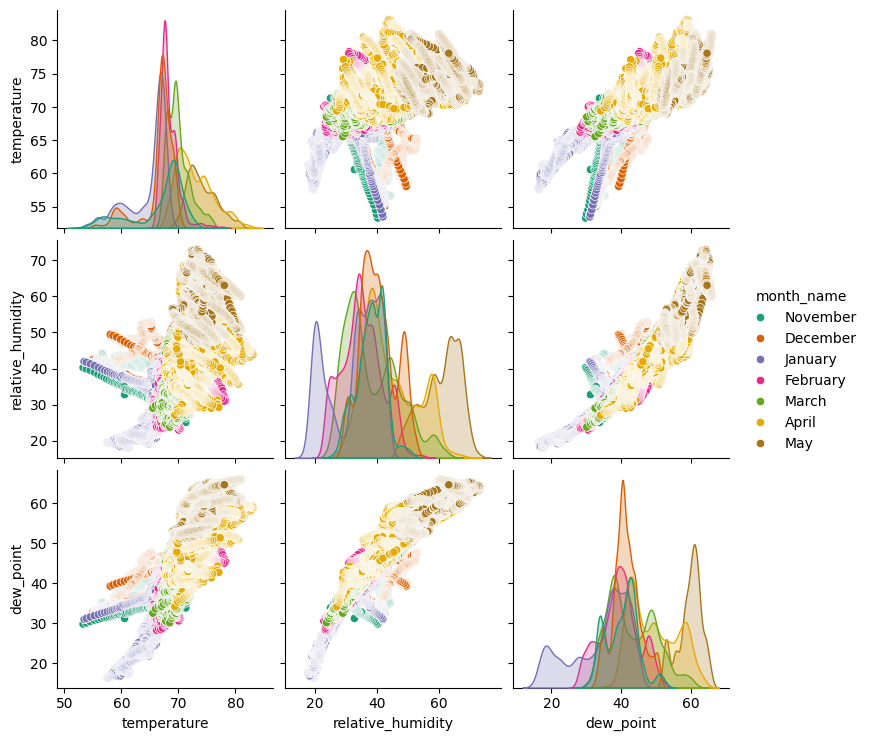

In [141]:
sns.pairplot(data=df_pairplot, hue='month_name', palette='Dark2')

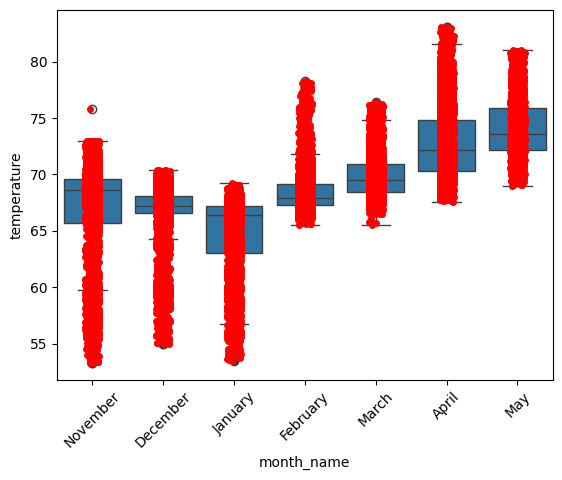

In [142]:
#sns.scatterplot(data=df_rename, x= 'month_name', y= 'temperature')
sns.boxplot(data=df_rename, x= 'month_name', y= 'temperature' )
sns.stripplot(data=df_rename, x='month_name', y='temperature', jitter=True, color='red')

plt.xticks(rotation = 45)
plt.show()

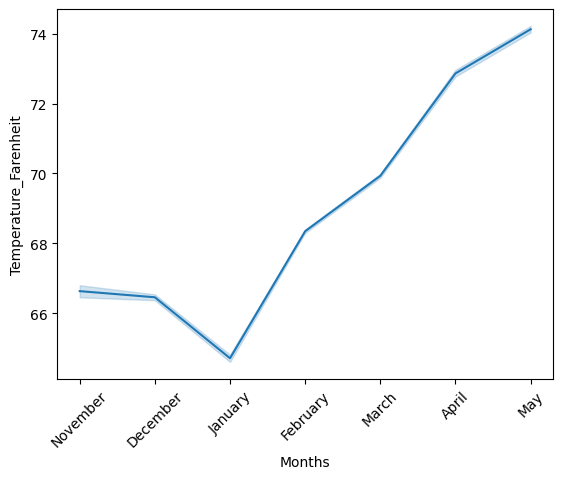

In [143]:
sns.lineplot(data=df_rename, x= 'month_name', y= 'temperature')

plt.xticks(rotation = 45, color='black')
plt.ylabel('Temperature_Farenheit', fontsize=10)
plt.xlabel('Months')

plt.show()

In [144]:
df_group = df_rename.groupby('month_name')['temperature'].sum()
df_group.head()

month_name
April       314753.23
December    296692.02
February    285435.56
January     288915.73
March       311766.94
Name: temperature, dtype: float64

In [145]:
df_group = pd.DataFrame(df_group)
df_group.reset_index
df_group['month_name'] = pd.Categorical(df_group['month_name'])
sns.lineplot(data=df_group, x= 'month_name', y = 'temperature')

plt.xticks(rotation=45)
plt.show()

KeyError: 'month_name'

In [ ]:
df_rename.head()

,#,date,temperature,relative_humidity,dew_point,time,month,month_name,time_period
0,1,2023-11-10 09:52:55,75.85,37.73,48.27,09:52:55,11,November,AM
1,2,2023-11-10 10:02:55,71.31,33.61,41.23,10:02:55,11,November,AM
2,3,2023-11-10 10:12:55,69.82,34.66,40.71,10:12:55,11,November,AM
3,4,2023-11-10 10:22:55,69.35,36.37,41.55,10:22:55,11,November,AM
4,5,2023-11-10 10:32:55,69.48,37.09,42.17,10:32:55,11,November,AM


In [ ]:
from sklearn.decomposition import PCA

df_pca = df_rename.iloc[:,[2,3,4]]

df_pca.info()
df_pca.isna().sum()

df_pca = df_pca.dropna()
df_pca.isna().sum()

pca = PCA(n_components=2)
pca_model=pca.fit_transform(df_pca)

#print(pca_model)

pca_model = pd.DataFrame(pca_model).rename(columns={'0': "pc1", '1':'pc2'})
pca_model.columns.to_list()
print(pca_model)

# print model outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27649 entries, 0 to 27648
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        27648 non-null  float64
 1   relative_humidity  27648 non-null  float64
 2   dew_point          27648 non-null  float64
dtypes: float64(3)
memory usage: 648.2 KB
               0         1
0       2.947913  8.633489
1      -5.599936  4.883550
2      -5.487630  2.996029
3      -3.793015  2.015086
4      -2.836865  1.946904
...          ...       ...
27643  33.000155  1.135271
27644  32.705943  1.751903
27645  32.668452  1.940545
27646  32.541450  2.171162
27647  32.464859  2.452328

[27648 rows x 2 columns]


In [ ]:
pca_model.columns.to_list()

[0, 1]

In [148]:

pca_model = pd.DataFrame(pca_model)
pca_model.columns.to_list()

pca_model1 = pca_model.rename(columns={0:'pc1',1:'pc2'})
pca_model1.head()

,pc1,pc2
0,2.947913,8.633489
1,-5.599936,4.883550
2,-5.487630,2.996029
3,-3.793015,2.015086
4,-2.836865,1.946904


<Axes: xlabel='pc1', ylabel='pc2'>

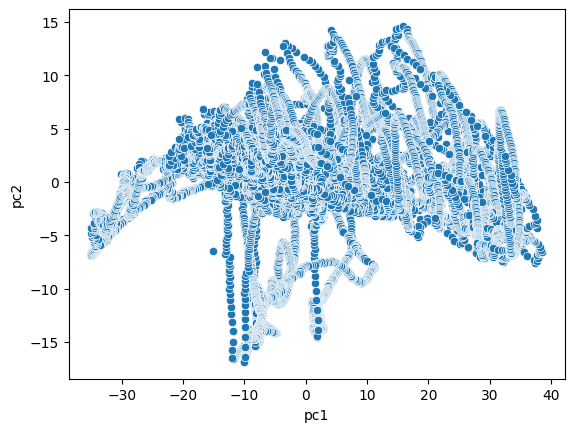

In [150]:
sns.scatterplot(data=pca_model1, x='pc1', y='pc2')